#### Business Problem

#### About Aerofit
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

#### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


#### Dataset
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:
1. Product Purchased:	KP281, KP481, or KP781
2. Age:	In years
3. Gender:	Male/Female
4. Education:	In years
5. MaritalStatus:	Single or partnered
6. Usage:	The average number of times the customer plans to use the treadmill each week.
7. Income:	Annual income (in $)
8. Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
9. Miles:	The average number of miles the customer expects to walk/run each week


Product Portfolio:

1. The KP281 is an entry-level treadmill that sells for USD 1,500.
2. The KP481 is for mid-level runners that sell for USD 1,750.
3. The KP781 treadmill is having advanced features that sell for USD 2,500.

#### Import the relevant libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Read the Dataset

In [4]:
df_aerofit_dataset = pd.read_csv('aerofit_treadmill.csv')

#### Dataset Exploration

In [5]:
df_aerofit_dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df_aerofit_dataset.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


#### Print the shape and the columns of the dataset

In [7]:
df_aerofit_dataset.shape

(180, 9)

In [8]:
df_aerofit_dataset.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

**Observation**
1. The Dataset consists of 180 rows and 9 columns
2. It seems the `Age`, `Education`, `Usage`, `Fitness`, `Income` and `Miles` contains Numerical data
3. The `Product`, `Gender`, `MaritalStatus` seems to be object type data

#### Print the datatype of the columns

In [9]:
df_aerofit_dataset.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [10]:
df_aerofit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observation**
1. It is clear that the datatypes of the columns are as expected. (Shared in the previous observation)
2. There are no missing values in the dataset and seems clean
3. There may be some invalid values in the columns which we might need to check.

#### Let's check the missing, invalid and duplicate values in the dataset

**Step 1: Let's try to see the missing values in the dataset**

In [11]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  # total number of null values
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(
        ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data  # return the dataframe

In [12]:
missing_check(df_aerofit_dataset)

,Total,Percent
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0
Usage,0,0.0
Fitness,0,0.0
Income,0,0.0
Miles,0,0.0


**Observation**
1. There are no missing values in the dataset

**Step 2: Let's try to see the duplicated values in the dataset**

In [13]:
df_aerofit_dataset[df_aerofit_dataset.duplicated()].sum()

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

**Observation**
1. It seems there are no duplicated values in the dataset

**Step 3: Let's see the unique values per columns**

In [14]:
df_aerofit_dataset.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

**Observation**
1. It seems `Product`, `Gender`, `Education`, `MaritalStatus`, `Usage`, `Fitness` can be treated as categorical columns
2. `Income`, `Age` and `Miles` are continuous Numerical columns.

#### Let's check the statistical summary of the dataset

In [15]:
df_aerofit_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


**Observation**
1. The minimum Age of the users seems to be 18 years, and maximum age 50 years
2. The 75% of the users have less than or equal to 33 years of age.
3. The 25% of the users rated themselves 3 out of 5 rating and 75% rated 4 out of 5. Which means most users feel healthy and in good shape.
4. Income columns seems to have high variation with max above 1 Lakhs and minimum below 30 thousand.
5. Since the 50% (Median) of columns `Income` and `Miles` and  is lesser than Mean, it seems to have right skewdness
6. `Age` and `Usage` columns seems to have high right skewness as well.
7. Data Skewness can be observed below as well.

In [16]:
df_aerofit_dataset.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

**Observation**
1. Income and Miles have very high right skewness.
2. Age and Usage columns seems to have high right skewness as well.
3. Fitness column seems to be moderately right skew.

#### Univariate Analysis: Let's understand about the values in the different columns

In [17]:
df_aerofit_dataset['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [18]:
def plot_pie(list_labels, list_values, col_name):
    colors = sns.color_palette('Set2')
    explode = [0.04 if i % 2 == 0 else 0.08 for i in range(len(list_values))]
    plt.title(f'Distribution of `{col_name}`', fontdict={'fontweight': 'bold', 'fontsize': 20})
    plt.pie(list_values,
            labels=list_labels,
            colors=colors,
            autopct='%.1f%%',
            shadow=True,
            explode=explode)

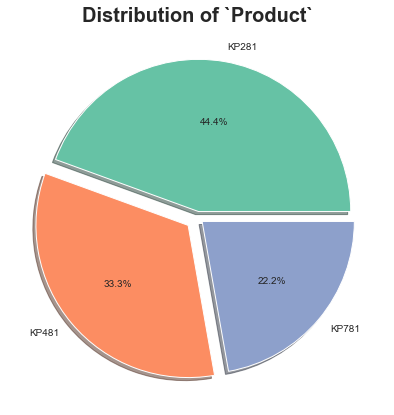

In [19]:
plt.figure(figsize=(7, 7))
dist_col_type = df_aerofit_dataset['Product'].value_counts()
plot_pie(dist_col_type.index, dist_col_type.values, 'Product')

**Observation**
1. The KP281 is an entry-level treadmill has almost 44% share
2. The KP481 is for mid-level runners has almost 33% share
3. The KP781 treadmill is having advanced features has almost 22% share

In [20]:
df_aerofit_dataset['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

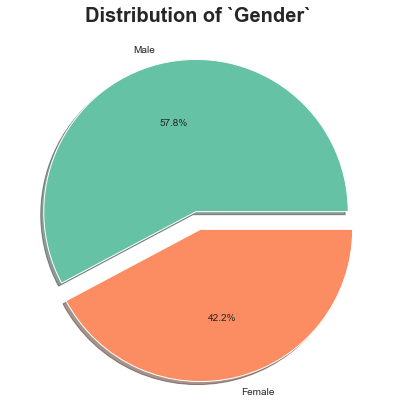

In [21]:
plt.figure(figsize=(7, 7))
dist_col_type = df_aerofit_dataset['Gender'].value_counts()
plot_pie(dist_col_type.index, dist_col_type.values, 'Gender')

**Observation**
1. The Male user comprises almost 58% user base
2. The Female user comprises almost 42% user base

In [22]:
df_aerofit_dataset['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

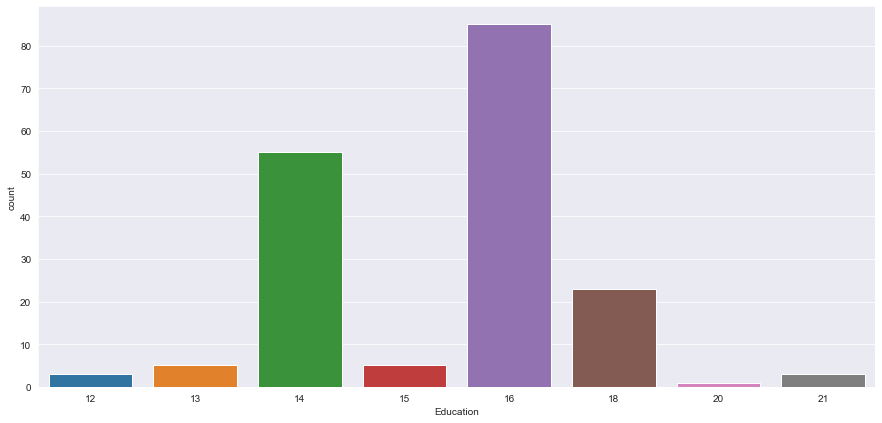

In [23]:
plt.figure(figsize=(15, 7))
sns.countplot(data= df_aerofit_dataset, x = 'Education');

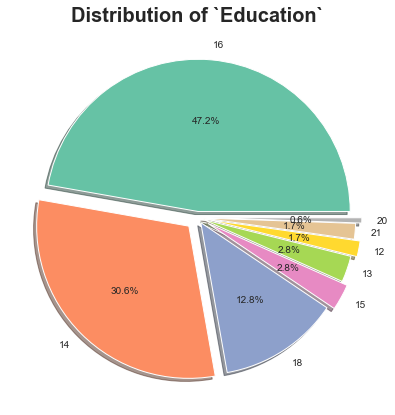

In [24]:
plt.figure(figsize=(7, 7))
dist_col_type = df_aerofit_dataset['Education'].value_counts()
plot_pie(dist_col_type.index, dist_col_type.values, 'Education')

**Observation**
1. There are only 3 prominent Education level which is 16, 14 and 18
2. Higher Education level and Lower Education level than above seems to be in minority in the user base.

In [25]:
df_aerofit_dataset['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

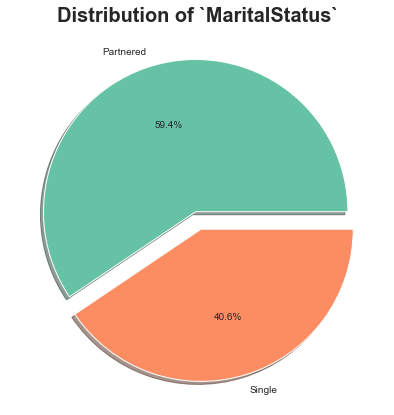

In [26]:
plt.figure(figsize=(7, 7))
dist_col_type = df_aerofit_dataset['MaritalStatus'].value_counts()
plot_pie(dist_col_type.index, dist_col_type.values, 'MaritalStatus')

**Observation**
1. Almost 50% of the user base is Partnered
2. And Almost 40% of the user base is Single

In [27]:
df_aerofit_dataset['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

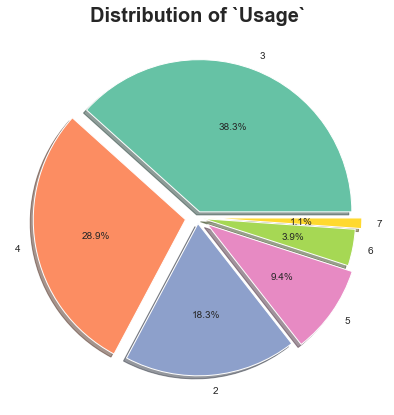

In [28]:
plt.figure(figsize=(7, 7))
dist_col_type = df_aerofit_dataset['Usage'].value_counts()
plot_pie(dist_col_type.index, dist_col_type.values, 'Usage')

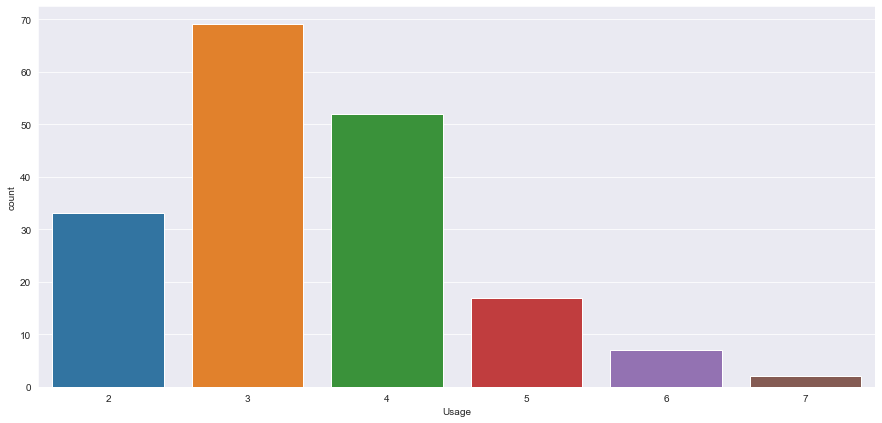

In [29]:
plt.figure(figsize=(15, 7))
sns.countplot(data= df_aerofit_dataset, x = 'Usage');

**Observation**
1. Usage of treadmill seems to be prominent among user base for 3 days/week, 4 days/week and 2 days/week
2. 3 days/week userbase is almost 38.3 %
3. 4 days/week is almost 29%.
4. 2 days/week user base is almost 18%.
5. Ideally we should promote users to use treadmill atleast 3 days a week.

In [30]:
df_aerofit_dataset['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

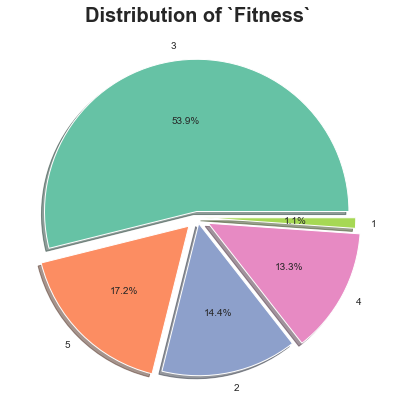

In [31]:
plt.figure(figsize=(7, 7))
dist_col_type = df_aerofit_dataset['Fitness'].value_counts()
plot_pie(dist_col_type.index, dist_col_type.values, 'Fitness')

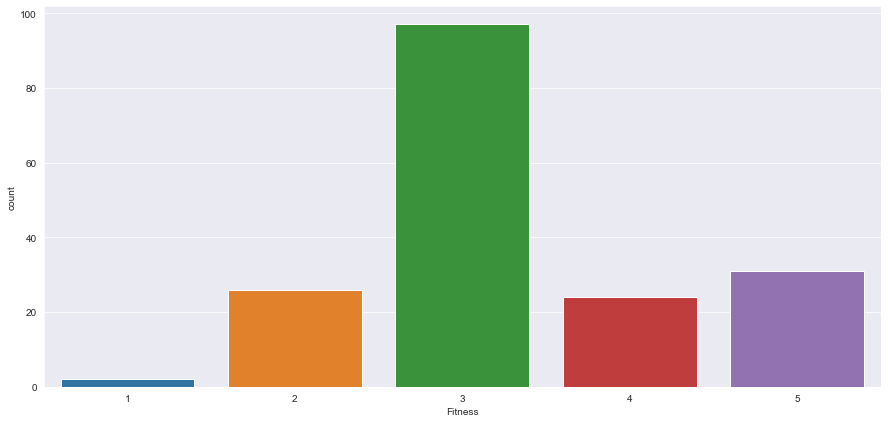

In [32]:
plt.figure(figsize=(15, 7))
sns.countplot(data= df_aerofit_dataset, x = 'Fitness');

**Observation**
1. User rating themselves 3/5 comprises 54% user base and is most prominent
2. User base rating themselves 5/5 comprises 17% of user base
3. User base rating themselves 2/5 comprises 14% of user base
4. User base rating themselves 4/5 comprises 13% user base.
5. Seems we should target users who rated themselves 2 and higher.

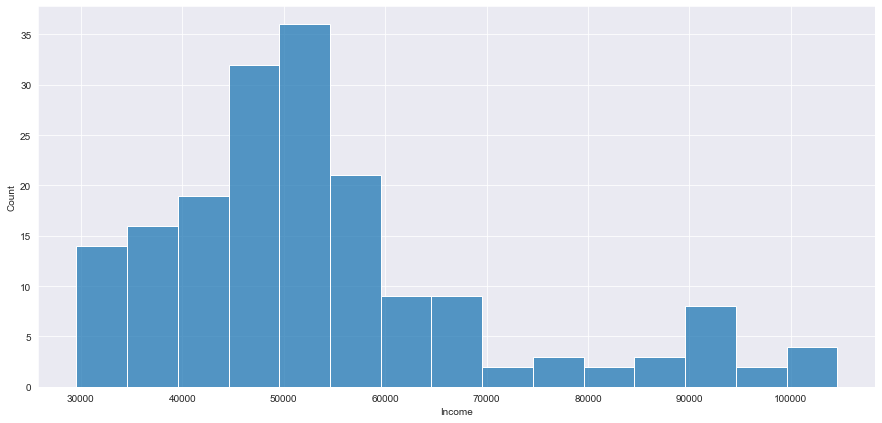

In [33]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df_aerofit_dataset, x='Income');

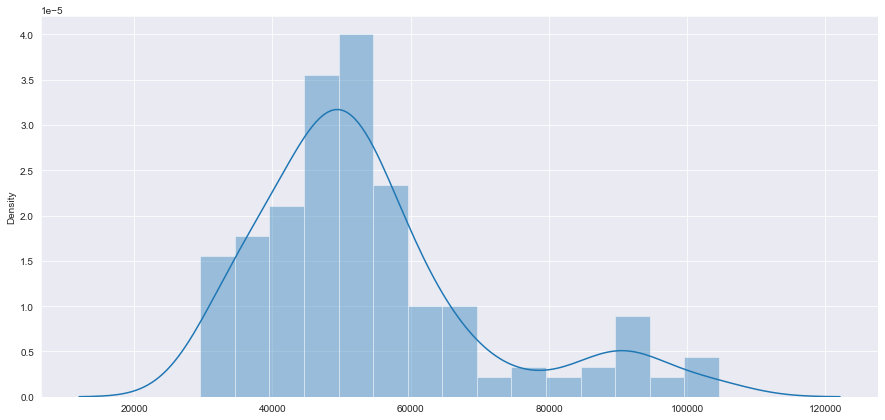

In [34]:
plt.figure(figsize=(15, 7))
sns.distplot(x = df_aerofit_dataset['Income']);

**Observation**
1. Most of the userbase seems to have income in bracket of 40K to 60K.
2. Although many users in the dataset have very higher payscale >80K.

#### Let's understand about the outlier values in the income from the box plot

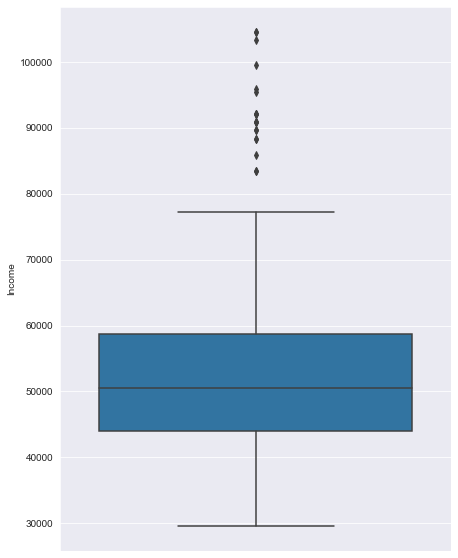

In [35]:
plt.figure(figsize=(7, 10))
sns.boxplot(data=df_aerofit_dataset, y='Income');

**Observation**
1. The median pay of users is around 50K
2. There are many outliers as well in the dataset ini terms of income.
3. 75% of user base has less than 60K income
4. There are many outliers in dataset who earn more than 80K.

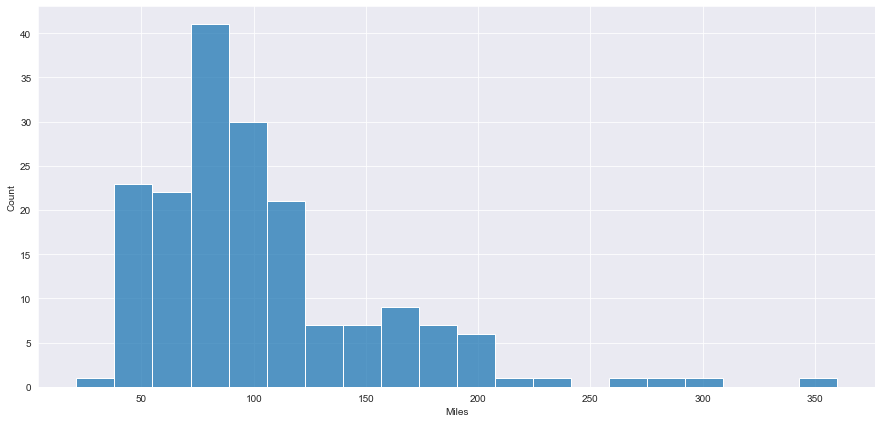

In [36]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df_aerofit_dataset, x='Miles');

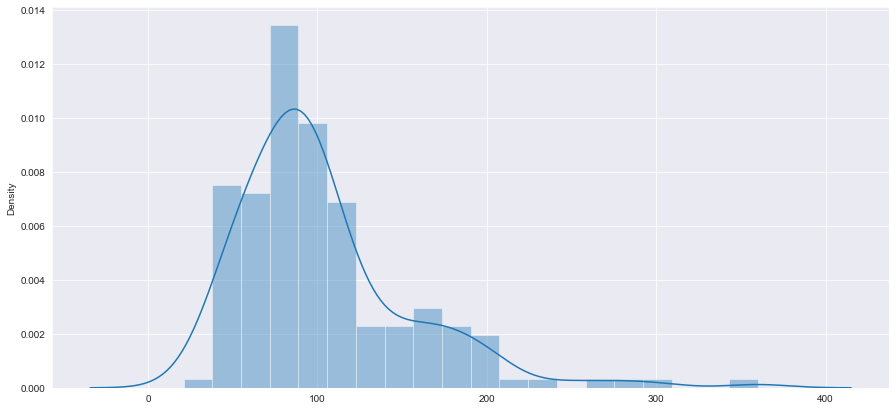

In [37]:
plt.figure(figsize=(15, 7))
sns.distplot(x = df_aerofit_dataset['Miles']);

**Observation**
1. The average number of miles user runs for 70 - 120.
2. We should encourage users to run in this range.
3. Although there seems to be many users who runs much more, based on data skewness

#### Let's understand about the outlier in the Miles column from the box plot

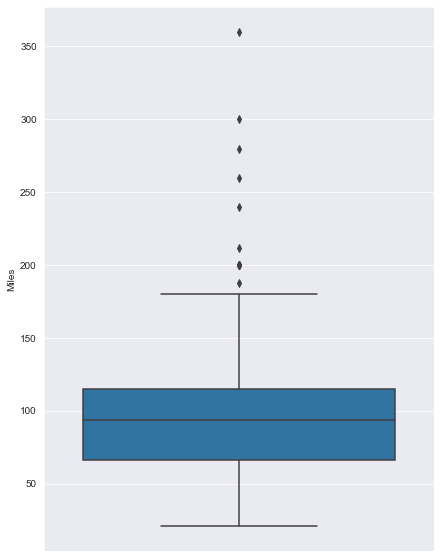

In [38]:
plt.figure(figsize=(7, 10))
sns.boxplot(data=df_aerofit_dataset, y='Miles');

**Observation**
1. 50% of users run close to 90 miles per week
2. 75% of users run less than or equal to 115 miles per week
3. There are many outliers who run above 180 miles per week
4. We should recommend users to run atleast 90 miles per week

#### BiVariate Analysis: Let's understand about the Impact of each of the columns on the product usage

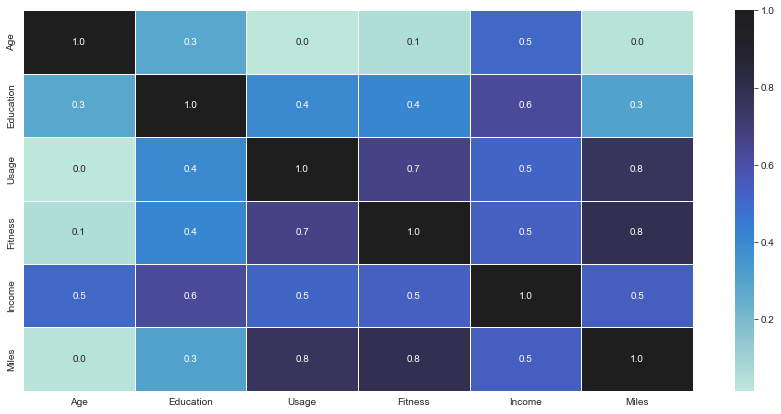

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(df_aerofit_dataset.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

**Observation**
1. Age seems to be weeky correlated with the Education
2. Education and Income seems to be highly correlated
3. Education and Fitness seems to be moderately correlated
4. Education and Usage seems to be moderately correlated
5. Usage and Fitness seems to be highly correlated
6. Usage and Income seems to be moderately correlated
7. Usage and Miles are very highly correlated
8. Fitness and income are very highly correlated
9. Fitness and Miles are very highly correlated
10. Income and Miles are moderatley correlated

**Step 1: Let's see Education impact on product**

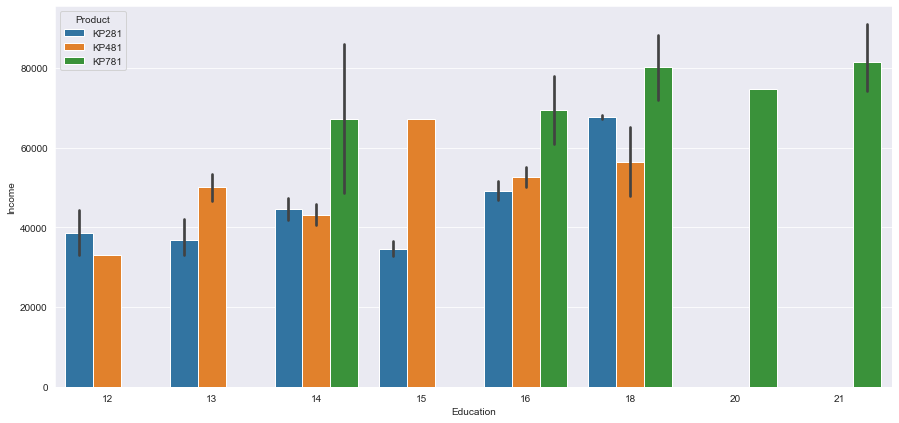

In [40]:
plt.figure(figsize=(15, 7))
sns.barplot(data = df_aerofit_dataset, x = 'Education', y = 'Income', hue='Product');

**Observation**
1. The KP281 users which is an entry-level treadmill, it seems to be used by high income (>40K) and educated people (>14 Education), we should promote that group KP781 which is a permium product
2. The KP481 in Education level 14, 16 and 18 user group and income (>40K) we should sell them KP781.

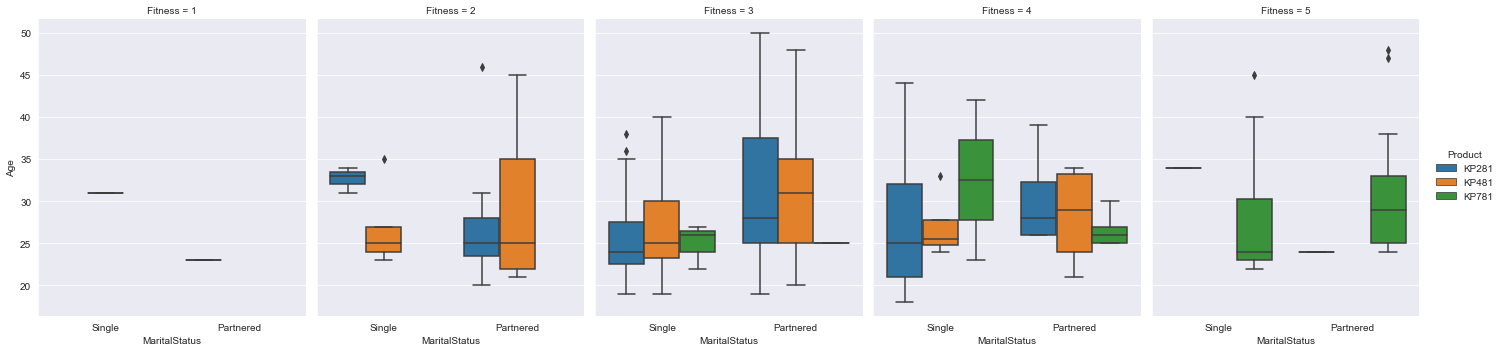

In [41]:
g = sns.catplot(x="MaritalStatus", y="Age", col= 'Fitness',
                data=df_aerofit_dataset,
                kind="box", height=5, aspect=.8, hue='Product')

**Observation**
1. We should avoid selling to users who rate themselves 1
2. It seems for Single users 25-30 we should promote KP781 having fitness >= 3
3. It seems for Partnered users 27-35 we should promote KP781 having fitness >= 3

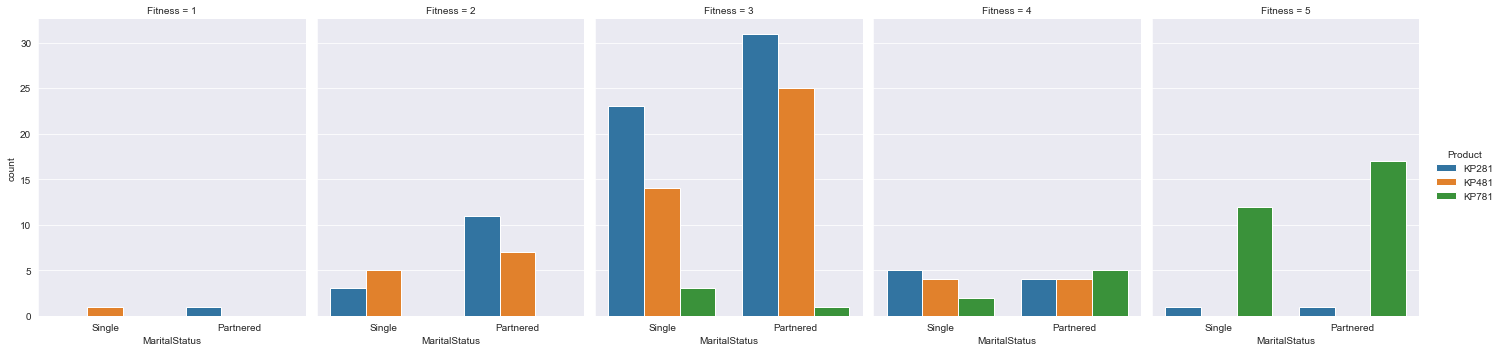

In [42]:
g = sns.catplot(x="MaritalStatus", col= 'Fitness',
                data=df_aerofit_dataset,
                kind="count", height=5, aspect=.8, hue='Product')

**Observation**
1. Fitness level 3 users are the highest users but they are using entry level tredmill, atleast they should use KP481 and for Partnered we should recommed KP781.

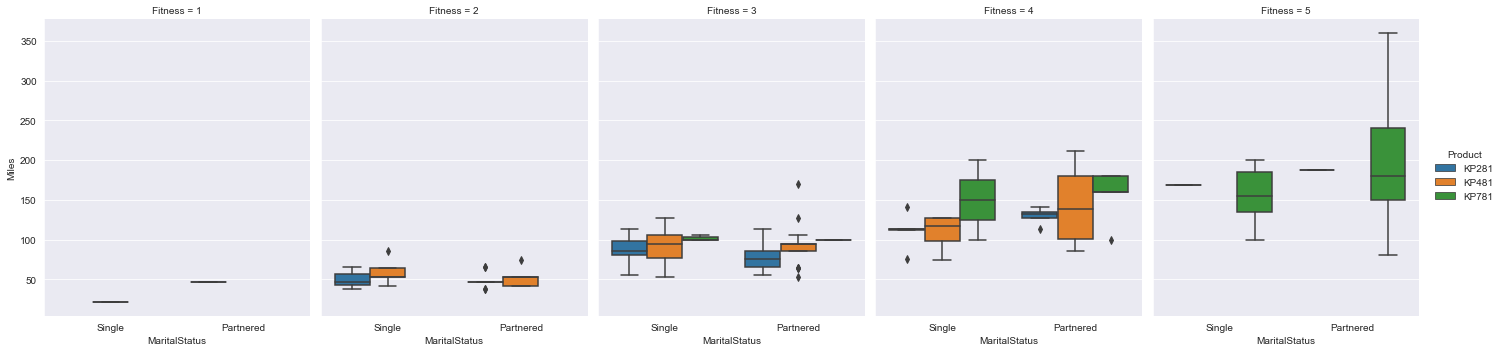

In [43]:
g = sns.catplot(x="MaritalStatus", y="Miles", col= 'Fitness',
                data=df_aerofit_dataset,
                kind="box", height=5, aspect=.8, hue='Product')

**Observation**
1. Fitness level 4 and Fitness leve 5 users run more miles
2. In Fitness level 4 Partnered we should promote KP781
3. In Fitness level 4 Single we should promote KP481

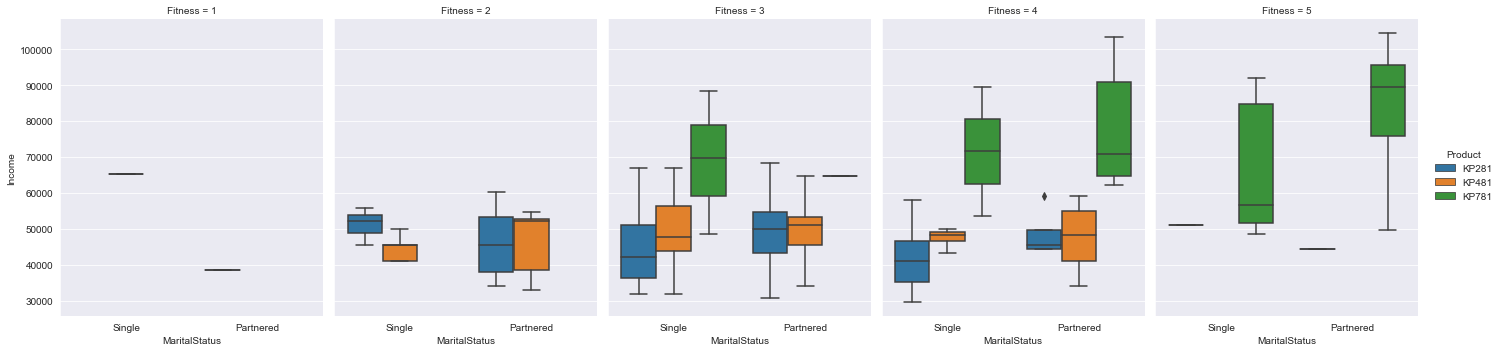

In [44]:
g = sns.catplot(x="MaritalStatus", y="Income", col= 'Fitness',
                data=df_aerofit_dataset,
                kind="box", height=5, aspect=.8, hue='Product')

**Observation**
1. Among higher income group having Fitness >= 3 KP781 is popular which is good
2. For users having income close to 50K and Single we should promote KP481 and fitness >= 3

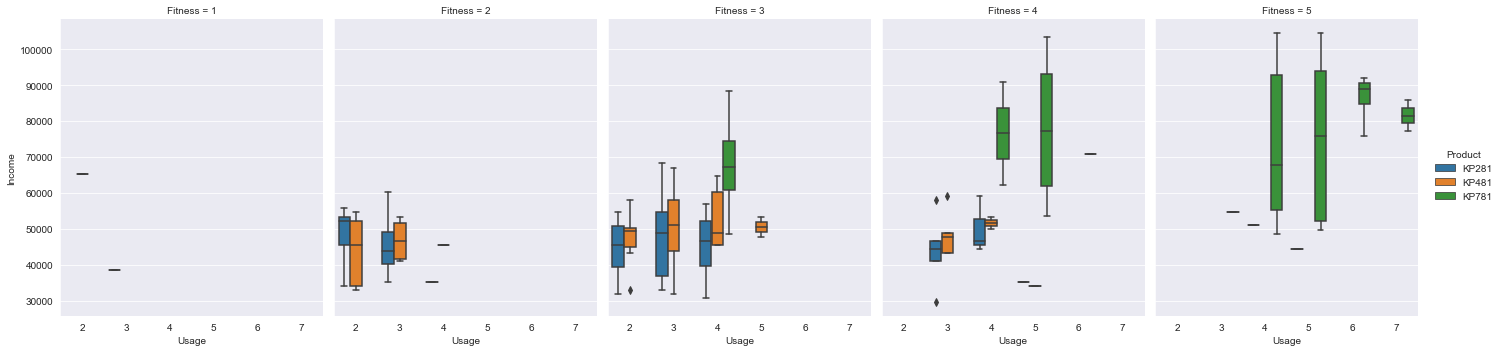

In [45]:
g = sns.catplot(x="Usage", y="Income", col= 'Fitness',
                data=df_aerofit_dataset,
                kind="box", height=5, aspect=.8, hue='Product')

**Observation**
1. Among people who are having income close to 50K and usage >= 3, we should promote to use KP481
2. Among people who have income >60K and Fitness >=3 and Usage >=4 we should promote KP781.

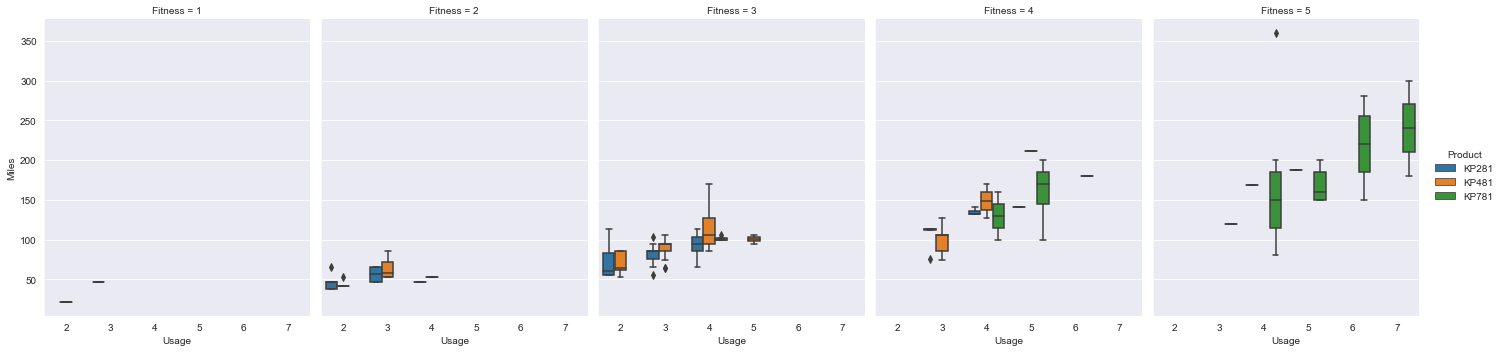

In [46]:
g = sns.catplot(x="Usage", y="Miles", col= 'Fitness',
                data=df_aerofit_dataset,
                kind="box", height=5, aspect=.8, hue='Product')

**Observation**
1. People who use more and run more miles prefer either KP481 or KP781.

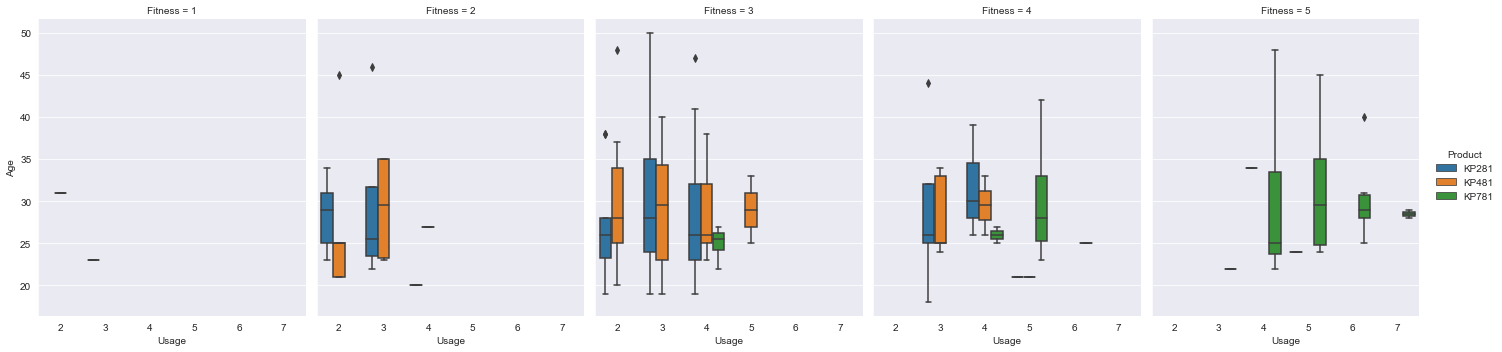

In [47]:
g = sns.catplot(x="Usage", y="Age", col= 'Fitness',
                data=df_aerofit_dataset,
                kind="box", height=5, aspect=.8, hue='Product')

**Observation**
1. People with age group 29-35 and usage 3 and 4 should use either KP481 or KP781 for best results
2. It seems with fitness level 3 KP281 is very popular

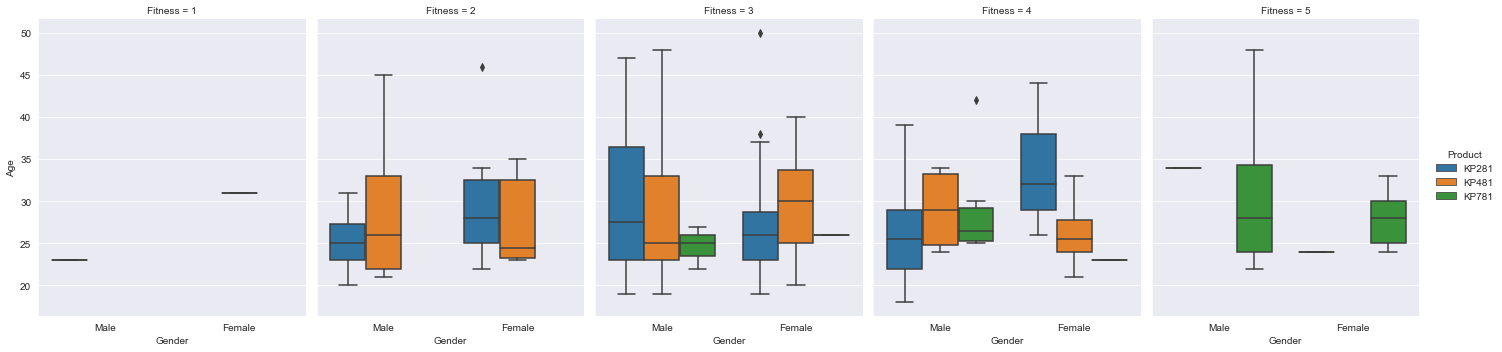

In [48]:
g = sns.catplot(x="Gender", y="Age",  col= 'Fitness',
                data=df_aerofit_dataset,
                kind="box", height=5, aspect=.8, hue='Product')

**Observation**
1. Males with fitness level 3 and Age less than 34 should be promoted KP481
2. Females with fitness level 3 and age close to 30 should be promoted KP481
3. Males with Fitness level 4 and Age greater than 27 should be promoted kP481 or KP781.

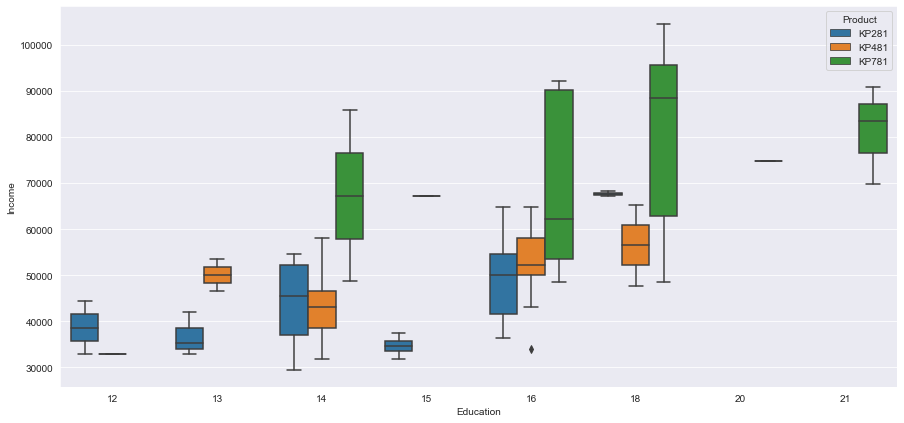

In [49]:
plt.figure(figsize=(15, 7))
sns.boxplot(data = df_aerofit_dataset, x = 'Education', y = 'Income', hue='Product');

**Observation**
1. Among people with higher income (>55K) and Education (>14) we should promote KP781
2. People with education 14 and 16 and income 45K should be promoted KP481
3. Low income people and low education people we can let them try KP281.

#### Lets see the Gender impact on product

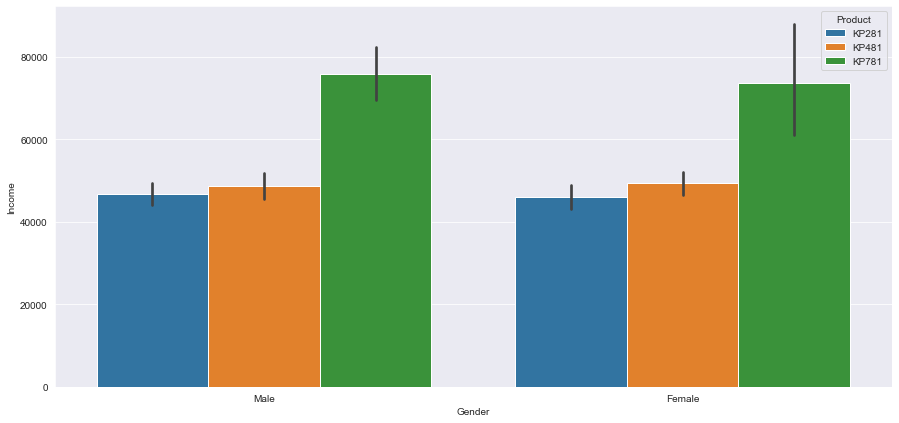

In [50]:
plt.figure(figsize=(15, 7))
sns.barplot(data = df_aerofit_dataset, x = 'Gender', y = 'Income', hue='Product');

**Observation**
1. For KP481 and KP281 we see that the trend usage among male and female are almost same
2. Higher income male and female are also similarly interested in the product KP781 but males seems to have higher confidence in purchasing the product.

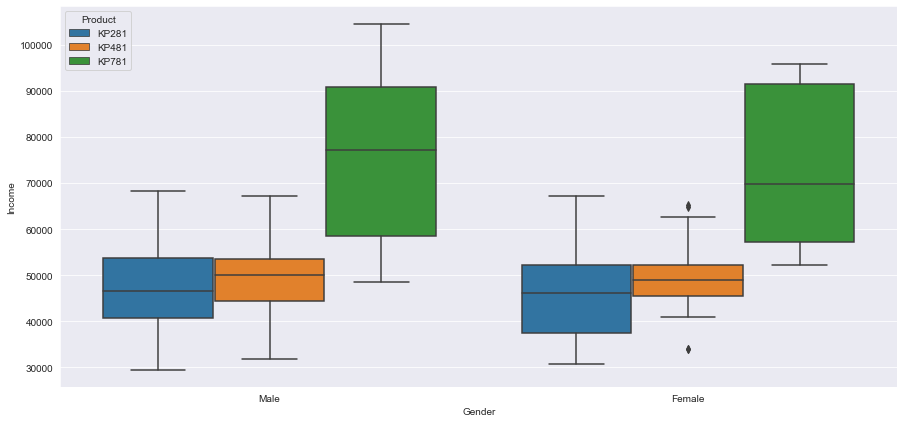

In [51]:
plt.figure(figsize=(15, 7))
sns.boxplot(data = df_aerofit_dataset, x = 'Gender', y = 'Income', hue='Product');

**Observation**
1. Males & Females with income >50K can be promoted KP781.
2. Females and Males with income >45K can be promoted KP481.

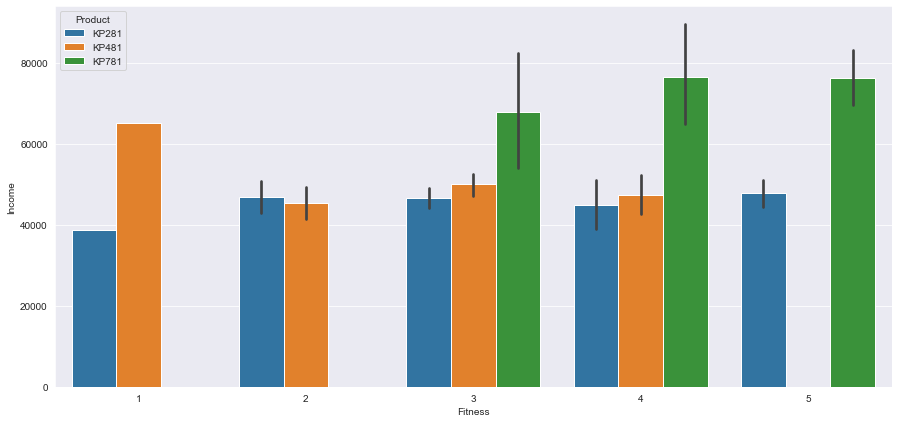

In [52]:
plt.figure(figsize=(15, 7))
sns.barplot(data = df_aerofit_dataset, x = 'Fitness', y = 'Income', hue='Product');

**Observation**
1. People with higher income >60K even with Fitness level 1 should be promoted KP781.
2. People with income >40K should be promoted KP481, irrespective of their Fitness levels.

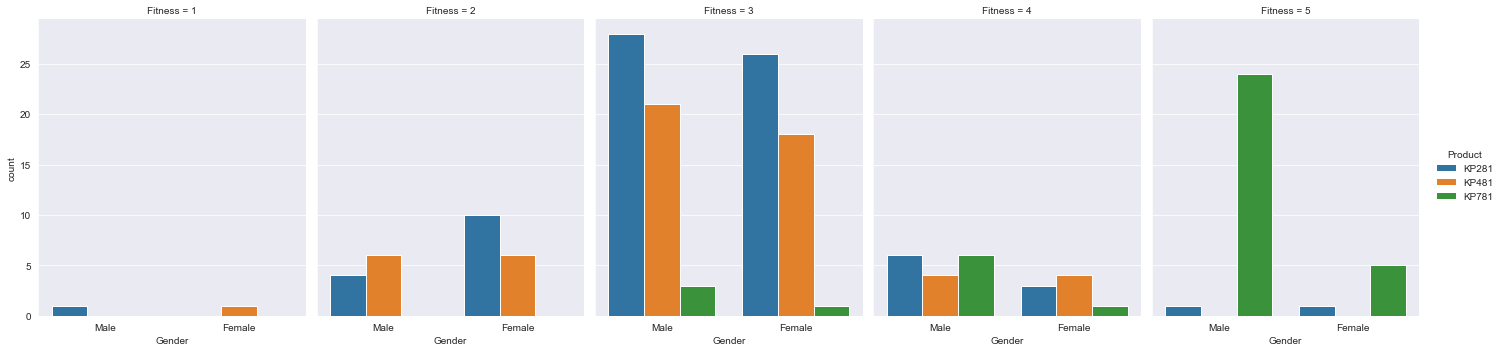

In [53]:
g = sns.catplot(x="Gender", col="Fitness", col_wrap=5,
                data=df_aerofit_dataset,
                kind="count", height=5, aspect=.8, hue='Product')

**Observation**
1. Females and Males with Fitness level 3 generally prefer KP281, we can promote KP481 to such individuals.
2. Females with Fitness level 4 prefer KP481.
3. Males with Fitness level 4 prefer KP781, but equal number also prefer KP281, we can identify and promote the sales of KP481 to such males.
4. Males and Females with fitness level 5 prefer KP781 which is good.

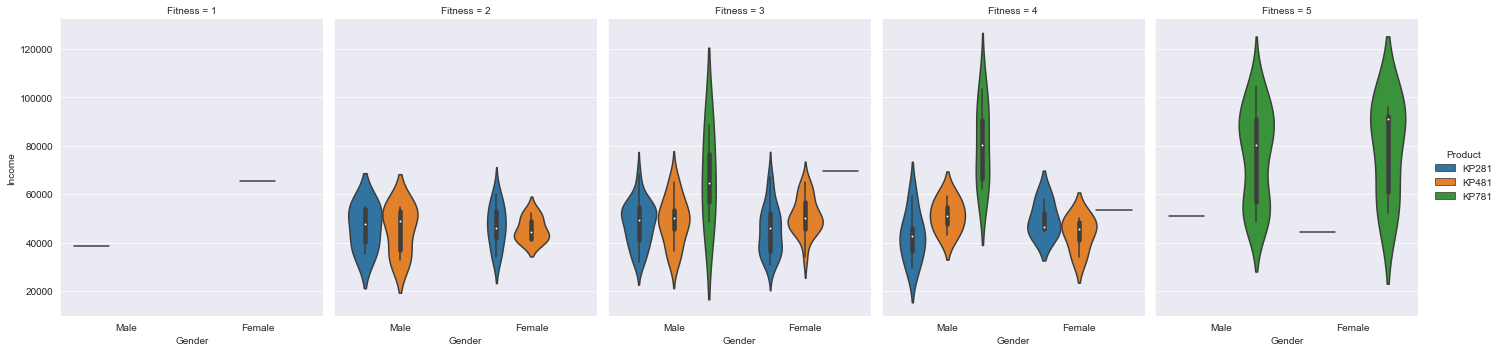

In [54]:
g = sns.catplot(x="Gender", y="Income", col= 'Fitness',
                data=df_aerofit_dataset,
                kind="violin", height=5, aspect=.8, hue='Product')

**Observation**
1. For Fitness level 2 & 3, The median income is slightly more for KP481 male users, so we can promote KP481 to almost all male users with this Fitness value.
2. For Fitness level 2, Female users tends to buy KP481 more with income above 40K.
3. For Fitness level 3, most female users with >45K prefer KP481, and we should encourage KP481 to such female users.
4. For fitness level 4, most of the higher income females prefer KP281, however we should promote KP481 to such female users.
5. For Fitness level 5, most of the male and female users are having higher income and prefer KP781 which is good.

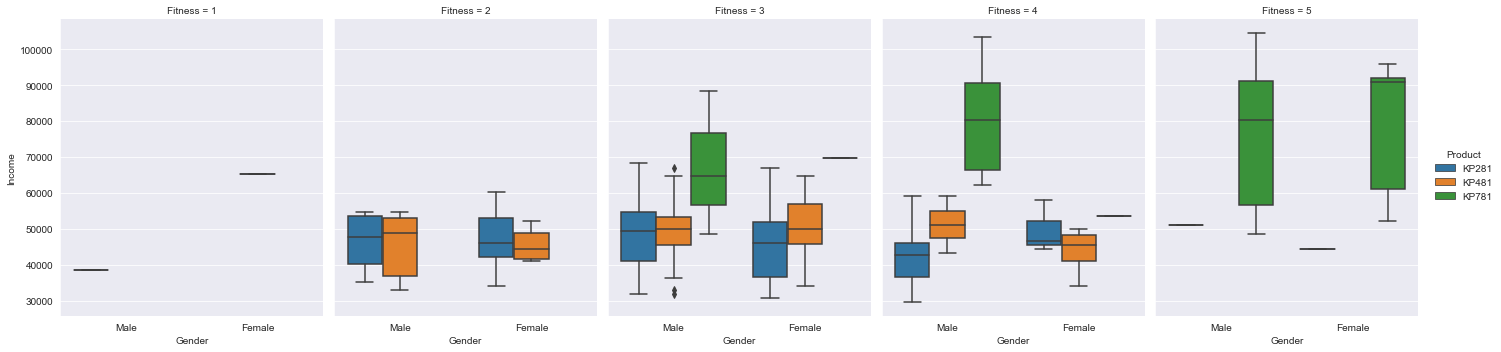

In [55]:
g = sns.catplot(x="Gender", y="Income", col= 'Fitness',
                data=df_aerofit_dataset,
                kind="box", height=5, aspect=.8, hue='Product')

**Observation**
1. For Fitness level 2 & 3, The median income is slightly more for KP481 male users, so we can promote KP481 to almost all male users with this Fitness value.
2. For Fitness level 2, Female users tends to buy KP481 more with income above 40K.
3. For Fitness level 3, most female users with >45K prefer KP481, and we should encourage KP481 to such female users.
4. For fitness level 4, most of the higher income females prefer KP281, however we should promote KP481 to such female users.
5. For Fitness level 5, most of the male and female users are having higher income and prefer KP781 which is good.

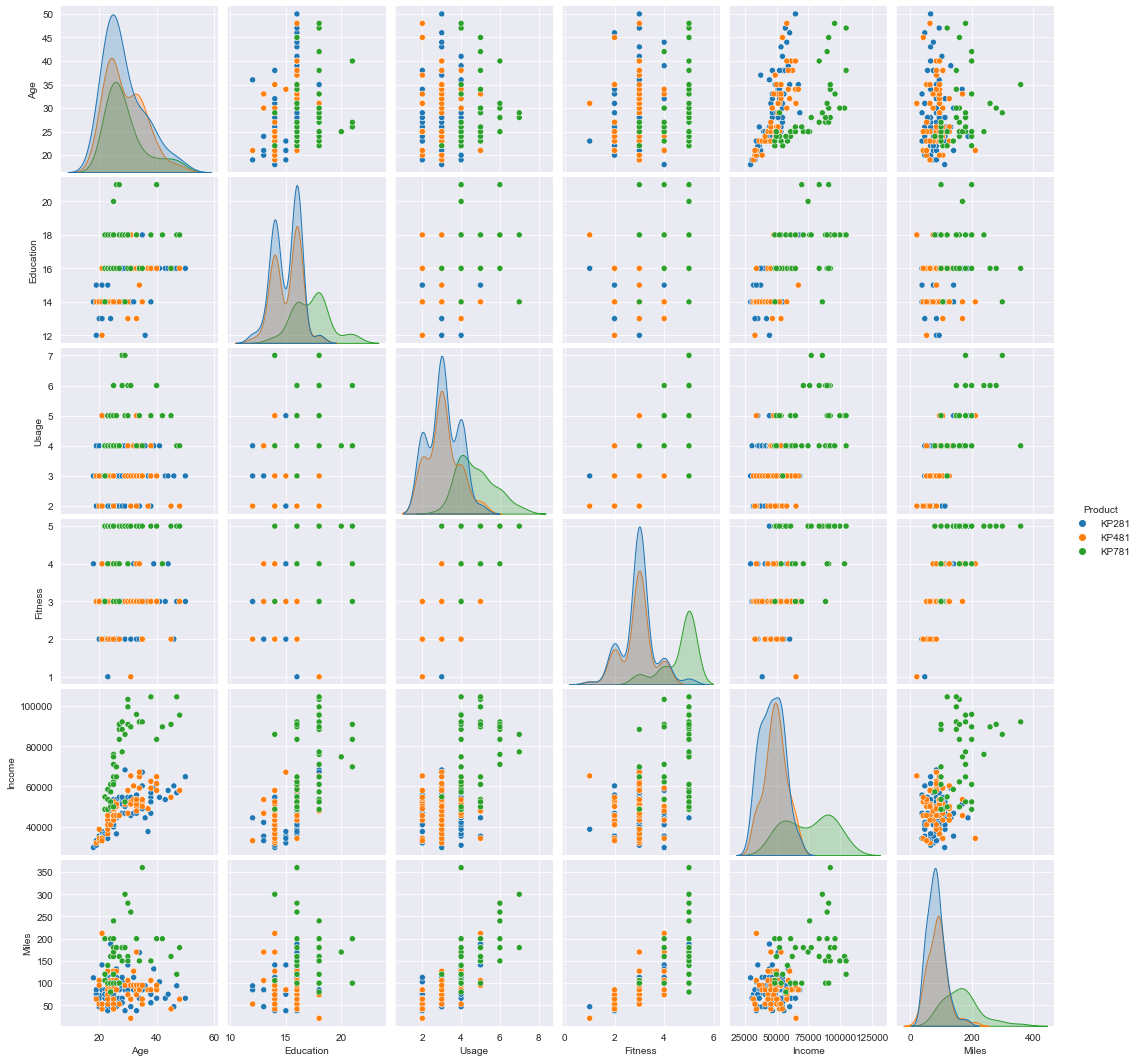

In [56]:
sns.pairplot(data=df_aerofit_dataset, hue='Product')

**Observation**
1. Age seems to be week correlated with the Education
2. Income and Miles are moderately correlated
3. Age and Miles have very low correlation

<Figure size 1080x504 with 0 Axes>

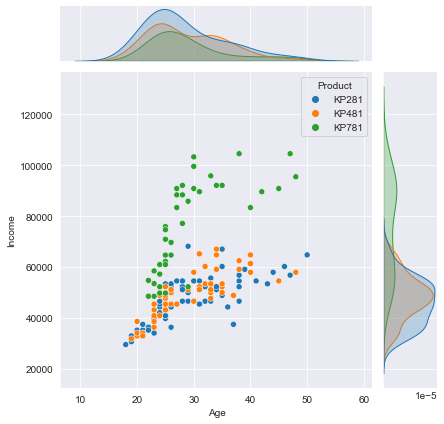

In [57]:
plt.figure(figsize=(15, 7))
sns.jointplot(data = df_aerofit_dataset, x = 'Age', y = 'Income', hue='Product');

**Observation**
1. Age and Income seems to have week correlation.
2. Most of the users are in the range 20 years to 30 years.
3. Most KP281 and KP481 users seems to have an overlap in the same income brackets.
4. KP781 users tends to have higher income

#### Let's compute compute conditional probabilities

P(Product | Gender)

In [58]:
pd.crosstab(df_aerofit_dataset['Product'], df_aerofit_dataset['Gender'], normalize='columns')

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


**Observation**
1. Probability of selling KP281 given female customers is higher (0.53) than Probability of selling it to males (0.38)
2. Probability of selling KP481 given female customers is higher (0.38) than Probability of selling it to males (0.29)
3. Probability of selling KP781 given female customers is lower (0.09) than Probability of selling it to males (0.31)

P(Product | Education)

In [59]:
pd.crosstab(df_aerofit_dataset['Product'], df_aerofit_dataset['Education'], normalize='columns')

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.086957,0.0,0.0
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.086957,0.0,0.0
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.826087,1.0,1.0


**Observation**
1. Probability of selling KP281 given Education level 15 customers is higher (0.8).
2. Probability of selling KP481 given Education level 14 is higher (0.42)
3. Probability of selling KP781 given education level 18 is highest (0.83)

P(Product | MaritalStatus)

In [60]:
pd.crosstab(df_aerofit_dataset['Product'], df_aerofit_dataset['MaritalStatus'], normalize='columns')

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


**Observation**
1. Probability of selling any of the product to Partnered and Single users is almost equal.

P(Product | Usage)

In [61]:
pd.crosstab(df_aerofit_dataset['Product'], df_aerofit_dataset['Usage'], normalize='columns')

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0


**Observation**
1. Probability of selling KP281 to Usage level 2 and 3 are higher, i.e, 0.58 and 0.54 respectively.
2. Probability of selling KP481 to Usage level 2 and 3 are higher, i.e, 0.42 and 0.44 respectively.
3. So with above point we conclude that we should promote KP481 to usage level 2 and 3.
4. Probability of selling KP781 to usage level 5 users is 0.71.

P(Product | Fitness)

In [62]:
pd.crosstab(df_aerofit_dataset['Product'], df_aerofit_dataset['Fitness'], normalize='columns')

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516
KP481,0.5,0.461538,0.402062,0.333333,0.000000
KP781,0.0,0.000000,0.041237,0.291667,0.935484


**Observation**
1. Probability of selling KP281 to 3 and 2 fitness level is highest i.e 0.56 and 0.54 respectively.
2. Probability of selling KP481 to 3 and 2 fitness level is highest i.e 0.40 and 0.46 respectively.
3. So we can conclude that we can try to sell KP481 to 2 and 3 fitness level.
4. Probability of selling KP781 to 5 fitness level is highest i.e 0.94.

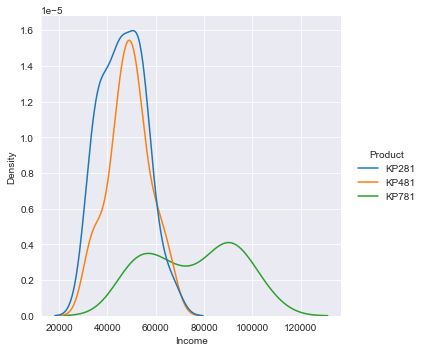

In [67]:
sns.displot(data=df_aerofit_dataset, x='Income', kind='kde', hue='Product');

**Observation**
1. Probability of selling KP281 and KP481 are higher in the income bracket 40K to 55K.
2. Probability of selling KP781 to higher income 80K to 100K.

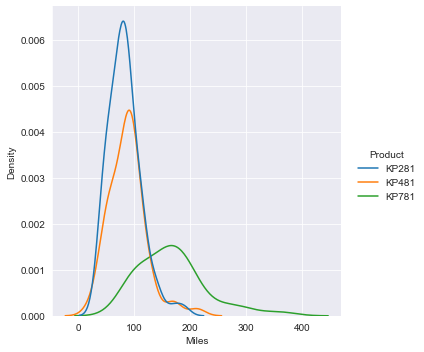

In [64]:
sns.displot(data=df_aerofit_dataset, x='Miles', kind='kde', hue='Product');

**Observation**
1. People with miles close to 100 seems to prefer KP281 and KP481.
2. People with miles close to 180 seems to prefer KP781.

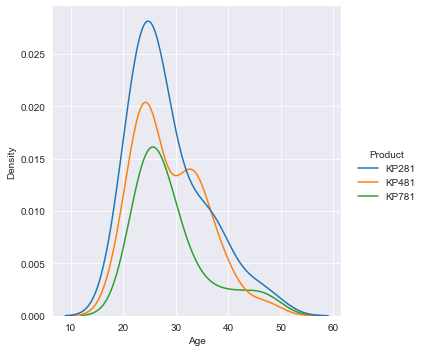

In [65]:
sns.displot(data=df_aerofit_dataset, x='Age', kind='kde', hue='Product');

**Observation**
1. People with Age <=30 seems to have high probability to invest in all the 3 products.
2. KP481 curve seems to be slightly bimodal, that means people above 30 years of age also prefers it